<a href="https://colab.research.google.com/github/sergeymasl/pandas_cource/blob/main/Data_Types_and_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Types and Missing Values**

## **Введение**

В этом уроке вы изучете какие типы данных есть в DataFrame и Series.
Также вы узнаете как заменять данные в DataFrame и Series.

Для демонстрации мы будем использовать датасет с данными о винах.

In [21]:
# импорт библиотеки
import pandas as pd
import numpy as np
# загрузка датасета для дальнейшей работы
reviews = pd.read_csv("https://drive.google.com/uc?export=download&id=1z-1idT4mGbOvHgmEPzneqV54EJ1-w7tk", index_col=0)


## **Типы данных**

>**Типы данных** -  это очень важная вещь, на которую **стоит потратить время** в самом начале вашей работы, то есть при загрузки данных.

>В противном случае, вы можете столкнуться с неправильными результатами или ошибками слишком поздно и на исправление этих ошибок уйдет много-много больше времени и нервов, чем вы бы потратили на работу с типами данных при загрузке.

Есть некоторая разница между типами данных в Pandas, NumPy и Python. Вот сравнительная табличка:

|Pandas        | Python        | NumPy                                                         | Описание                                         |
|---           |---            |---                                                            |---                                                    |
|object        |str или смесь  |string_, unicode_, смешанные типы                              | Текстовые или смешанные числовые и нечисловые значения|
|int64         |int            |int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64 | Целые числа                                           |
|float64       |float          |float_, float16, float32, float64                              | Числа с плавающей точкой                              |
|bool          |bool           |bool_                                                          | Значения True/False                                   |
|datetime64    |datetime             |datetime64[ns]                                                 | Значения даты и времени                               |
|timedelta[ns] |NA             |NA                                                             | Разность между двумя datetimes                        |
|category      |NA             |NA                                                             | Ограниченный список текстовых значений                |

Рассмотрим на примере что может быть не так с данными, возьмем пример с "грязными" данными о вине:

In [2]:
dirty_data = pd.read_csv("https://drive.google.com/uc?export=download&id=11xDK6SRQcClzHHXeLC6rUlc2fmNyFt9i", index_col=0)
dirty_data

,points,price,title,was_tested,sizes_of_bottles,month,day,year
0,87.0,$24.00,Nicosia 2013 Vulkà Bianco (Etna),No,not known,1,10,2021
1,87.0,$15.00,Quinta dos Avidagos 2011 Avidagos Red (Douro),Yes,187,6,15,2021
2,87.0,$14.00,Rainstorm 2013 Pinot Gris (Willamette Valley),Yes,187,3,29,2021
3,87.0,$13.00,St. Julian 2013 Reserve Late Harvest Riesling ...,Yes,375,10,27,2021
4,87.0,$65.00,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Yes,750,2,2,2021


Данные не выглядят "грязно" в прямом смыле это слова, но для корректной работы с ними, необходимо провести некоторые манипуляции.

Попробуем найти сумму всех цен:

In [3]:
dirty_data['price'].sum()

'$24.00$15.00$14.00$13.00$65.00'

В итоге мы получили не арифметическое сложение, а строковую конкатенацию, т.к. столбец ```price``` был загружен в строковом формате из-за символа ```$```.

Проверить какие форматы у столбцов можно с помощью метода ```dtypes``` для DataFrame и ```dtype``` для Series.

In [4]:
dirty_data.dtypes

points              float64
price                object
title                object
was_tested           object
sizes_of_bottles     object
month                 int64
day                   int64
year                  int64
dtype: object

Также можно использовать метод ```info()```

In [5]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   points            5 non-null      float64
 1   price             5 non-null      object 
 2   title             5 non-null      object 
 3   was_tested        5 non-null      object 
 4   sizes_of_bottles  5 non-null      object 
 5   month             5 non-null      int64  
 6   day               5 non-null      int64  
 7   year              5 non-null      int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 360.0+ bytes


После проверки автоматически подгружаемых типов данных, мы можем изменить для удобства дальнейшей работы:

1. `points` - `float64`, ничего страшного в числах с плаващей запятой нет, но при целочисленных значениях удобнее работать с `int64`.
2. `price` - `object`, то есть строковый формат, а нужен числовой.
3. `title` - все ок
4. `was_tested` - `object`, т.к. он содержит два значения `да` и `нет`, то удобнее было бы работать с типом данных `bool` (`True`,`False`)
5. `sizes_of_bottles` - `object` (то есть строковый), этот столбец отвечает за размер бутылки, логично, что он долже быть числовым.
6. Также у нас есть столбцы `Month`, `Day` и `Year`, с которыми удобнее будет работать в `datetime64`.

Для дальнейшей работы, необходимо изменить типы данных:
>`points`: `float64` → `int64`

>`price`: `object` → `float64`

>`was_tested`: `object` → `bool`

>`sizes_of_bottles`: `object` → `int64`

>`Month`, `Day`, `Year`  → `datetime64`

**Есть несколько способов преобразования данных в DataFrame:**
>Использование метода `astype()`

>Написание собственной функции для сложных изменений

>Использование функций `pd.to_numeric()` и `pd.to_datetime()`

## **Использование `astype()`**

Первый метод который мы рассмотрим это метод `astype()`
Этот метод подходит при изменении *заменимых* типов данных, то есть для такой замены при которой не потеряется и не исказиться первоначальный смысл данных.

То есть, его можно использовать при изменении целочисленное значение в число с плавающей запятой.
Можно изменять любой тип данных в строковый.

Можно использовать для замены числа с плавающей запятой в целочисленное значение, **НО**, только если вы уверены в том, что вы не потеряете дробные части.

В нашем случае столбец `points` не имеет дробной части, поэтому изменим тип данных на `int64`:

In [6]:
dirty_data['points'] = dirty_data['points'].astype('int')
dirty_data

,points,price,title,was_tested,sizes_of_bottles,month,day,year
0,87,$24.00,Nicosia 2013 Vulkà Bianco (Etna),No,not known,1,10,2021
1,87,$15.00,Quinta dos Avidagos 2011 Avidagos Red (Douro),Yes,187,6,15,2021
2,87,$14.00,Rainstorm 2013 Pinot Gris (Willamette Valley),Yes,187,3,29,2021
3,87,$13.00,St. Julian 2013 Reserve Late Harvest Riesling ...,Yes,375,10,27,2021
4,87,$65.00,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Yes,750,2,2,2021


Если в строковом выражении есть символы которые нельзя интерпритировать как часть числа, то применить метод `astype` не получиться.

In [7]:
# это приобразование вызовет исключение
try:
  dirty_data['price'].astype('float')
# отработаем его и посмотрим на его суть
except Exception as ex:
  print(f'Тип исключения: \033[1m{type(ex)}\033[0m')
  print(f'Описание исключения: \033[1m{ex}\033[0m')

Тип исключения: <class 'ValueError'>
Описание исключения: could not convert string to float: '$24.00'


In [8]:
# попробуем со столбцом sizes_of_bottles
try:
  dirty_data['sizes_of_bottles'].astype('int')
# отработаем исключение его и посмотрим на его суть
except Exception as ex:
  print(f'Тип исключения: \033[1m{type(ex)}\033[0m')
  print(f'Описание исключения: \033[1m{ex}\033[0m')

Тип исключения: <class 'ValueError'>
Описание исключения: invalid literal for int() with base 10: 'not known'


Теперь попробуем применить метод `astype()` к столбцу `was_tested` для преобразования его в булевы величины, и сравним его с первоначальным:

In [9]:
# соединим два столбца (про соединение узнаем позже), оригинальный и измененный
pd.concat([dirty_data['was_tested'], dirty_data['was_tested'].astype('bool').rename('bool_was_tested')], axis = 1)

,was_tested,bool_was_tested
0,No,True
1,Yes,True
2,Yes,True
3,Yes,True
4,Yes,True


Метод `astype()` преобразовал все данные в `True`, хотя в первой строке у нас стоит No. Это происходит потому что при преобразовании в `bool` за True принимается все что не ноль или не пусто.

In [10]:
pd.concat([pd.Series(name = 'source', data = [0, 1, 2, None, 'Строка', None]), pd.Series(name = 'bool', data = [0, 1, 2, None, 'Строка', None]).astype('bool')], axis = 1)

,source,bool
0,0,False
1,1,True
2,2,True
3,None,False
4,Строка,True
5,None,False


**Вывод:** метод `astype()` не всегда приводит к положительным результатам.

## **Собственные функции преобразования**

Так как данные преобразовать эти данные чуть труднее создадим собственные функции.

Для начала преобразуем столбец с ценой в `float64`

In [11]:
def convert_price(value):
    """
    Функция заменяет знак доллара на ничто (то есть удаляет)
    и преобразует в float
    """
    float_value = float(value.replace('$', ''))
    return float_value

Используем `map` для преобразования и сравним: 

In [12]:
new_dtype = dirty_data['price'].map(convert_price).dtype
print(f'Тип данных у измененного столбца: \033[1m{new_dtype}\033[0m\n')

pd.concat([dirty_data['price'], dirty_data['price'].map(convert_price)], axis = 1)

Тип данных у измененного столбца: float64



,price,price
0,$24.00,24.0
1,$15.00,15.0
2,$14.00,14.0
3,$13.00,13.0
4,$65.00,65.0


Точно так же преобразуем столбец `was_tested` в `bool` но на этот раз с помощю `lambda`, также здесь можно использовать [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html):

In [13]:
dirty_data['was_tested'].map(lambda x: True if x == 'Yes' else False)

0    False
1     True
2     True
3     True
4     True
Name: was_tested, dtype: bool

**Вывод:** при сложных преобразованиях вы можете использовать собственные функции преобразования

##**Использование функций `pd.to_numeric()` и `pd.to_datetime()`**

`pd.to_numeric()` позволяет исходя из названия преобразовывать данные в числовой формат, метод хорошо отработает при наличии в одном столбце чисел и строк (то есть в ячейке либо число, либо строка), хороший пример это столбец `sizes_of_bottles`. Используем параметр `errors=coerce` для преобразования в NaN (об этом чуть позже)

In [14]:
new_column = pd.to_numeric(dirty_data['sizes_of_bottles'], errors='coerce')

pd.concat([dirty_data['sizes_of_bottles'], new_column], axis = 1)

,sizes_of_bottles,sizes_of_bottles
0,not known,NaN
1,187,187.0
2,187,187.0
3,375,375.0
4,750,750.0


Подробнее о методе [`pd.to_numeric()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html)

`pd.to_datetime()` позволяет преобразовать столбцы с месяцем годом и днем в новый столбец с типом данных `datetime`

Документация по [`pd.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).

In [18]:
# преобразование
date_column = pd.to_datetime(dirty_data[['year', 'month', 'day']])
# сравнение
print(f'тип данных: {date_column.dtype}')
print()
pd.concat([dirty_data[['year', 'month', 'day']], date_column], axis = 1)

тип данных: datetime64[ns]



,year,month,day,0
0,2021,1,10,2021-01-10
1,2021,6,15,2021-06-15
2,2021,3,29,2021-03-29
3,2021,10,27,2021-10-27
4,2021,2,2,2021-02-02


## **Преобразования при импорте данных**

Для убодства использования все преобразования можно заложить при импорте данных, для этого используются праметры `dtype` и `converters`.

>`dtype` отвечает за преобразование данных как метод `astype()`

>`converters` отвечает за пользовательские функции

Считаем данные еще раз с использованием полученных знаний:

In [ ]:
convert_was_tested = lambda x: True if x == 'Yes' else False

clean_data = pd.read_csv("https://drive.google.com/uc?export=download&id=11xDK6SRQcClzHHXeLC6rUlc2fmNyFt9i", index_col=0,
                         dtype = {'points' : 'int'},
                         converters = {'price' : convert_price,
                                       'was_tested' : convert_was_tested,
                                       'sizes_of_bottles' : lambda x: pd.to_numeric(x, errors='coerce'),
                                       })
clean_data

,points,price,title,was_tested,sizes_of_bottles,month,day,year
0,87,24.0,Nicosia 2013 Vulkà Bianco (Etna),False,NaN,1,10,2021
1,87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro),True,187.0,6,15,2021
2,87,14.0,Rainstorm 2013 Pinot Gris (Willamette Valley),True,187.0,3,29,2021
3,87,13.0,St. Julian 2013 Reserve Late Harvest Riesling ...,True,375.0,10,27,2021
4,87,65.0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,True,750.0,2,2,2021


# **Пропущенные значения (или пустые значения)**

В Pandas пропущеные значения обозначают как `NaN`, сокращенное от `Not a Number`. И технически `NaN` имеет тип данных `float64`.

Pandas имеет методы для выбора пропущенных значений:
>`pd.isnull()` - отмечает пропущенные значения как `True`

>`pd.notnull()` - наоборот, отмечает как `True` непропущенные значения

In [38]:
# загрузим данные для примера
miss_val = pd.read_csv("https://drive.google.com/uc?export=download&id=1P3QtHtvSc0nvtryLnNBmq-ldo4HlojBB", index_col = 0)
miss_val

,country,random_num
0,,
1,NaN,94.0
2,NaN,NaN
3,Sweden,5.0
4,NaN,18.0
5,France,NaN
6,Malaysia,NaN
7,NaN,20.0
8,Czech Republic,58.0
9,NaN,67.0


Постмотрим работу функции со столбцом `country`

In [57]:
# добавим новые столбцы для сравнения работы функций
miss_val['country_isnull'] = miss_val['country'].isnull()
miss_val['country_notnull'] = miss_val['country'].notnull()

# расскрасим датафрейм для отображения взаимосвязи
def isnull_highlight(x, color):
  return np.where((x.isnull()) | (x == True) , f"background-color: {color};", None)

def notnull_highlight(x, color):
  return np.where((x.notnull()) ^ (x == False) , f"background-color: {color};", None)

miss_val_color = miss_val.style.apply(isnull_highlight, color='#F19CBB', subset=['country','country_isnull'])\
    .apply(notnull_highlight, color='#BDECB6', subset=['country', 'country_notnull'])

miss_val_color

,country,random_num,country_isnull,country_notnull
0,,,,
1,nan,94.000000,True,False
2,nan,nan,True,False
3,Sweden,5.000000,False,True
4,nan,18.000000,True,False
5,France,nan,False,True
6,Malaysia,nan,False,True
7,nan,20.000000,True,False
8,Czech Republic,58.000000,False,True
9,nan,67.000000,True,False


Также Эти функции можно использовать для фильтрации DataFrame:

In [58]:
# сортировка без пропущенных значений в столбце Country
miss_val[pd.notnull(miss_val['country'])]

,country,random_num,country_isnull,country_notnull
0,,,,
3,Sweden,5.0,False,True
5,France,NaN,False,True
6,Malaysia,NaN,False,True
8,Czech Republic,58.0,False,True


In [59]:
# сортировка только пропущенные значения в столбце Country
miss_val[pd.isnull(miss_val['country'])]

,country,random_num,country_isnull,country_notnull
0,,,,
1,NaN,94.0,True,False
2,NaN,NaN,True,False
4,NaN,18.0,True,False
7,NaN,20.0,True,False
9,NaN,67.0,True,False
10,NaN,11.0,True,False


Также Pandas имеет методы по замене пустых значений или по удалению строк с пропущенными значениями:
>`pd.fillna()`

и

>`pd.dropna()`

## **`pd.fillna()`**

`pd.fillna(value=None, method=None, axis=None, inplace=False, limit=None)` - это метод по замене пропущенных значений
- `value` - значение на которое вы хотите заменить пропущенное значение, может быть одним значением, а может быть словарем в котором ключи это названия столбцов, а значения это, то на что заменить пропущенное значение. 
- `method` - можно заменить пропущенные значения, используя внутренние методы `{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’}`
--  `pad` и `ffill` - присваивают пропущенным значениям **последнее не пустое значение, шедшее перед ними** в столбце (axis = 0) или в строке (axis = 1)  
-- `backfill` и `bfill` - присваивают пропущенным значениям **первое не пустое значение, идущее после них** в столбце (axis = 0) или в строке (axis = 1)  
- `axis` - смена оси работы метода, при замене значений с использованием `method`
- `inplace` - параметр, отвечающий за изменение исходного массива

Примеры:

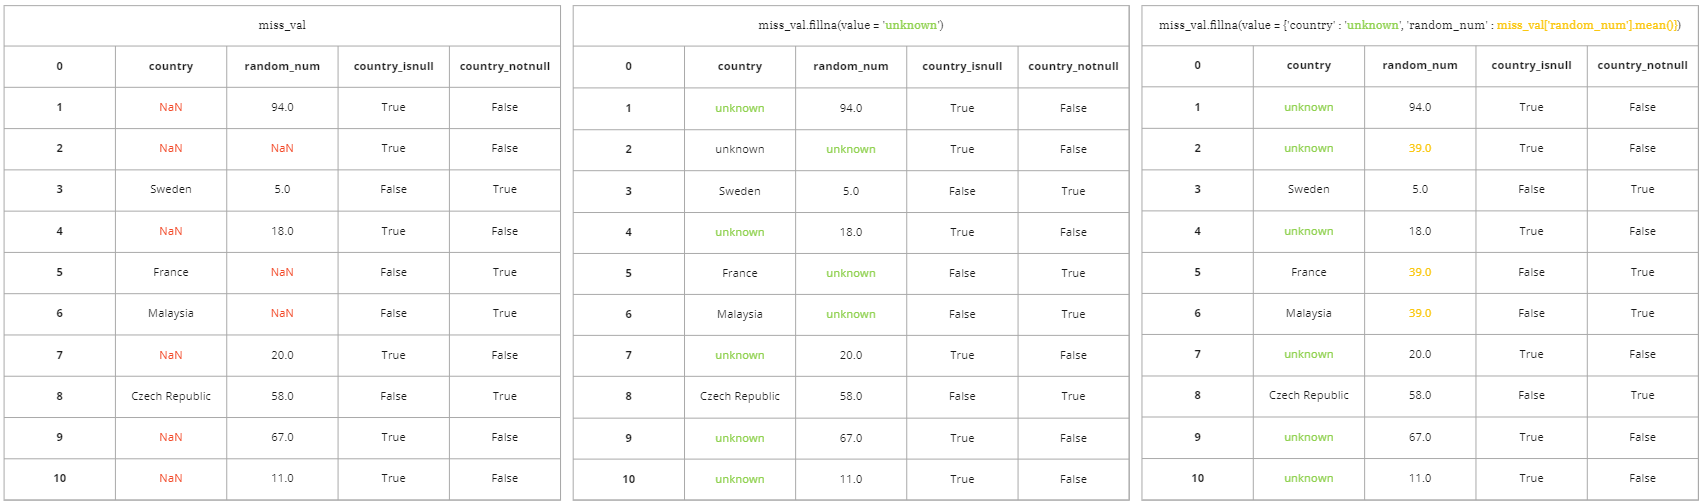

In [119]:
miss_val.fillna(method = 'pad')

,country,random_num,country_isnull,country_notnull
0,,,,
1,NaN,94.0,True,False
2,NaN,94.0,True,False
3,Sweden,5.0,False,True
4,Sweden,18.0,True,False
5,France,18.0,False,True
6,Malaysia,18.0,False,True
7,Malaysia,20.0,True,False
8,Czech Republic,58.0,False,True
9,Czech Republic,67.0,True,False


In [118]:
miss_val

,country,random_num,country_isnull,country_notnull
0,,,,
1,NaN,94.0,True,False
2,NaN,NaN,True,False
3,Sweden,5.0,False,True
4,NaN,18.0,True,False
5,France,NaN,False,True
6,Malaysia,NaN,False,True
7,NaN,20.0,True,False
8,Czech Republic,58.0,False,True
9,NaN,67.0,True,False


Доп. материалы:
>Библиотека для наглядного отображения пропущенных значений [missingno](https://github.com/ResidentMario/missingno)